<a href="https://colab.research.google.com/github/gonoott/-ProyectoDSParteI-ottaviano/blob/main/ProyectoDSParte1Ottaviano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de las importaciones de vehiculos de New york en el año 1985

#### El objetivo de este proyecto es analizar los datos de los vehiculos importados a new york en el año 1985 y sus caracteristicas, adentrandonos en las exigencias del mercado automotor  de esa epoca , con algunas de las variables posteriormente mencionadas

# Abstract

En el presente analisis se colectaron datos de diferentes fuentes enumeradas: 1) Especificaciones de autos y camiones de importación de modelos de 1985, Anuario automotriz de Ward de 1985. 2) Manuales personales de automóviles, Oficina de servicios de seguros, 160 Water Street, Nueva York, NY 10038. 3) Informe de colisión de seguros, Instituto de seguros para la seguridad en las carreteras, Watergate 600, Washington, DC 20037.

Lo primero fue revisar los datos para asegurarnos de que contamos con la informacion necesaria para abordar el analisis y establecer una conclusion, posteriormente se verifico que no haya datos nulos o vacios que vandalicen nuestra interpretacion de la informacion.
La decision de este analisis se basa en inenter entender el mercado automotor de esa epoca, para posteriormente poder analizar años mas recientes y descubrir si la demanda de ese mercado cambio a lo largo del tiempo.


In [ ]:
import pandas as pd

df = pd.read_csv("C:\\Users\\gonza\\Downloads\\archive\\Automobile_data.csv")

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Hipotesis

La hipotesis que vamos a plantear en este proyecto parte de que hay una tendendcia del mercado a ciertas marcas y tipos de motor especificos.

# Tratamiento de los datos

Lo primero es controlar los datos, para eso vamos a verificar si tenemos valores indefinidos o nulos y que son coincidentes con las variables que queremos analizar.



In [ ]:
print(((df.isnull()) | (df == '') | (df == ' ')).sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


# Visualizacion de los datos

La eleccion del tipo de combustible es muy pronunciada hacia los motores a gasolina, que suelen ser los mas elegidos para los usuarios con vehiculos de uso personal, mientras que los motores diesel son los preferidos de los vehiculos utilitarios.

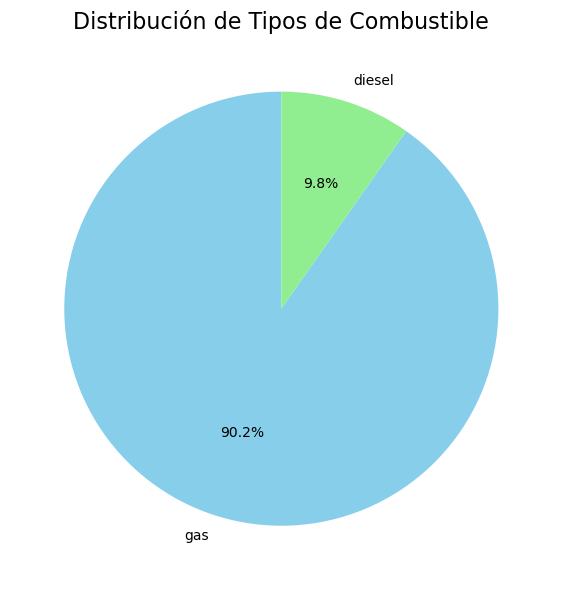

In [ ]:
fuel_counts = data['fuel-type'].value_counts()

plt.figure(figsize=(8, 6))
fuel_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Distribución de Tipos de Combustible', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

<Axes: xlabel='fuel-type', ylabel='count'>

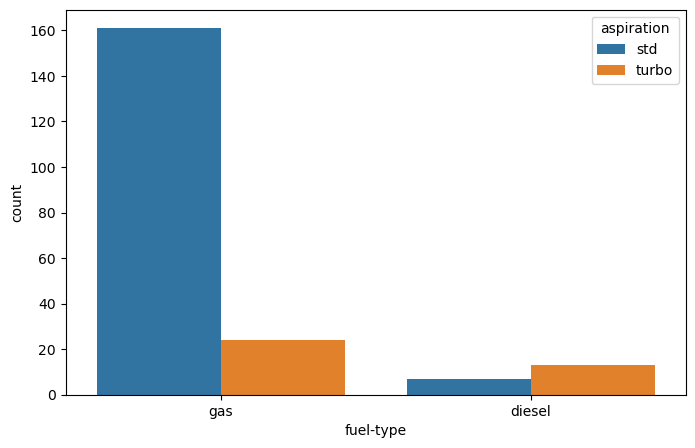

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='fuel-type', hue='aspiration')



1- En el grafico de arriba se puede ver una fuerte tendencia a los motores aspirados y de combustion a gasolina,  y por el lado de los motores diesel vemos una mayor captura de motores turbo, ya que la mayoria de los motores diesel vienen con turbo para mejorar las prestaciones que difieren al motor a gasolina.

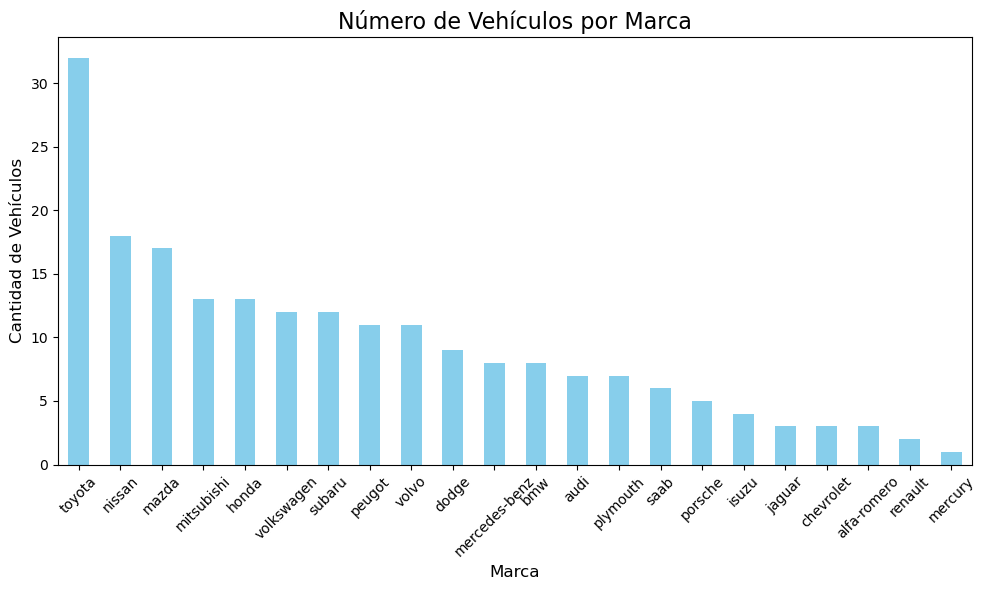

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path =("C:\\Users\\gonza\\Downloads\\archive\\Automobile_data.csv")
data = pd.read_csv(file_path)

vehicle_counts = data['make'].value_counts()

plt.figure(figsize=(10, 6))
vehicle_counts.plot(kind='bar', color='skyblue')
plt.title('Número de Vehículos por Marca', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Cantidad de Vehículos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

2- En este grafico estan a la vista las preferencias de los usuarios de las distintas marcas de vehiculos, con una dominancia absoluta de toyota, y de las primeras marcas del mercado asiatico.

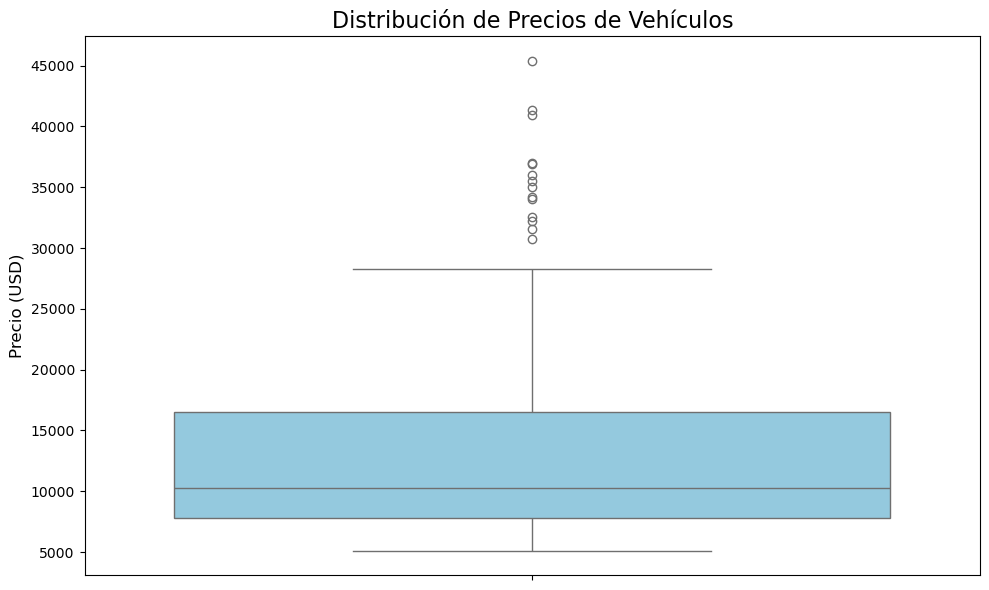

In [ ]:
import numpy as np

data['price'] = data['price'].replace('?', np.nan)

data['price'] = pd.to_numeric(data['price'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='price', color='skyblue')
plt.title('Distribución de Precios de Vehículos', fontsize=16)
plt.ylabel('Precio (USD)', fontsize=12)
plt.tight_layout()
plt.show()

Para la realizacion de este grafico, se tuvieron que limpiar algunos datos nulos para el analisis.
Se deja en constancia que este no es el grafico mas adecuado para el analisis de esta variable, pero fue de interes incluirlo en el proyecto, para el analisis estadistico.

Vemos que la mediana esta en los 10.000 (usd) con varios valores atipicos por encima del percntil 4, lo que nos indica que tenemos dos posbiles tendencias, la gama media o baja donde se concentran la mayoria de los datos y los vehiculos de alta gama (mayor precio), graficados como valores atipicos.

# Conclusiones

Despues de la presentacion de las variables de mayor interes podemos concluir que la hipotesis resulta verdadera, ya que se enceuntran ciertas tendencias en el mercado de vehiculos importados del año 1985, en New york, las principales tendencias denotadas en el proyecto son las de los motores aspirados a gasolina, de marcas asiaticas liderada fuertemente por la marca Toyota, con vehiculos de gama media.